In [3]:
%cd /content/drive/MyDrive/LearningMaterial/RL

/content/drive/MyDrive/LearningMaterial/RL


In [4]:
!ls

 BellmanEquation  'MonteCarlo Methods'	      Temporal-Difference-Learning
 config.sh	  'MultiArm-Bandit Problem'
 gym-bandits	   README.md


In [5]:
%cd gym-bandits 

/content/drive/MyDrive/LearningMaterial/RL/gym-bandits


In [6]:
import gym
import gym_bandits
import numpy as np

In [7]:
env = gym.make('BanditTwoArmedHighLowFixed-v0')

In [8]:
count = np.zeros(2)
sum_rewards = np.zeros(2)
Q = np.zeros(2)
num_rounds = 100

> **Defining the UCB function**

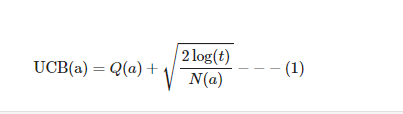

In [9]:
def UCB(i):
  ucb = np.zeros(2)
  if i < 2:
    return i
  
  else:
    for arm in range(2):
      ucb[arm] = Q[arm] + np.sqrt((2 * np.log(sum(count))) / count[arm])

    return np.argmax(ucb)


In [11]:
for i in range(num_rounds):

  arm = UCB(i)
  s_, r, done, info = env.step(arm)
  count[arm] += 1
  sum_rewards[arm] += r

  Q[arm] = sum_rewards[arm]/count[arm]

In [12]:
Q

array([0.74418605, 0.26666667])

# Thompson Sampling

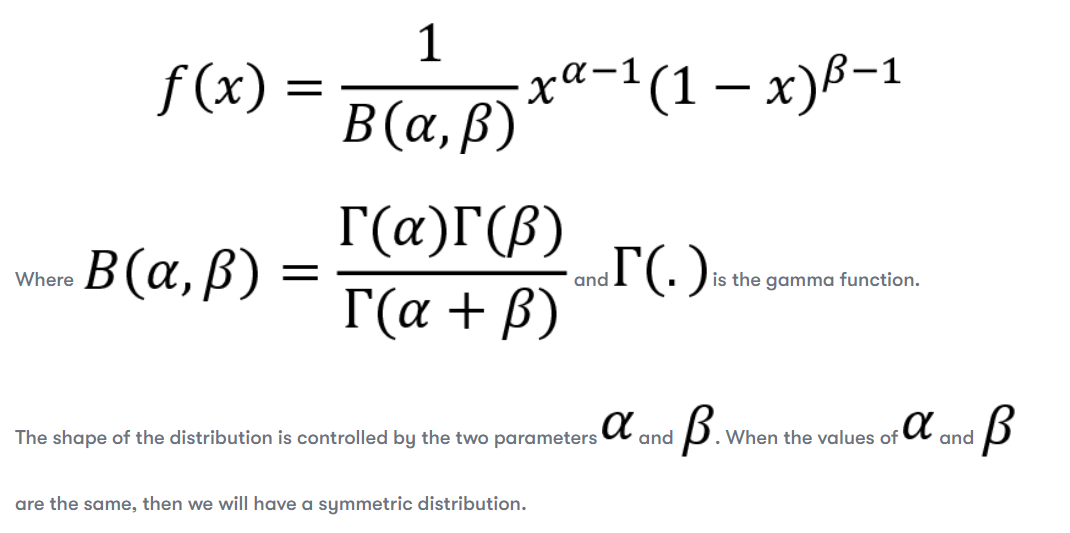

In [13]:
def thompson_sampling(alpha, beta):
  samples = [np.random.beta(alpha[i] + 1, beta[i] + 1) for i in range(2)]

  return np.argmax(samples)

In [15]:
alpha = np.ones(2)
beta = np.ones(2)



In [16]:
for i in range(num_rounds):
  arm = thompson_sampling(alpha, beta)
  s_, r, done, info = env.step(arm)

  count[arm]+=1
  sum_rewards[arm]+=r
  Q[arm] =sum_rewards[arm]/count[arm]

  if r ==1:
    alpha[arm] +=1
  else:
    beta[arm] +=1

In [17]:
Q

array([0.78021978, 0.21052632])